In [25]:
import pandas as pd
import numpy as np
#Import plot package
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
import sys

In [26]:
results = pd.read_csv('buffer.csv')
results.columns

Index(['index', 'nearest_x', 'nearest_y', 'station_id', 'x', 'y', 'docks_num',
       'destinatio', 'distance', 'population', 'bus_stop', 'tube_num',
       'deg_mopeak', 'deg_nipeak', 'ride_len', 'egi_mopeak', 'egi_nipeak',
       'finance', 'leisure', 'residence', 'shopping', 'university',
       'restaurant'],
      dtype='object')

In [30]:
#overview the variables 

columns_to_calculate = [
    'docks_num', 'destinatio', 'finance', 'restaurant',
    'residence', 'leisure', 'shopping', 'university', 'population', 'bus_stop',
    'tube_num', 'deg_mopeak', 'deg_nipeak', 'ride_len', 'egi_mopeak',
    'egi_nipeak'
]

# print the output
for column in columns_to_calculate:
    std_deviation = results[column].std()
    print(f"{column} std: {std_deviation:.3f}")


docks_num std: 8.735
destinatio std: 0.010
finance std: 1.386
restaurant std: 4.701
residence std: 2.677
leisure std: 3.259
shopping std: 7.006
university std: 0.397
population std: 912.583
bus_stop std: 3.452
tube_num std: 0.553
deg_mopeak std: 0.058
deg_nipeak std: 0.100
ride_len std: 23.614
egi_mopeak std: 0.025
egi_nipeak std: 0.017


In [32]:
for column in columns_to_calculate:
    average = results[column].mean()
    print(f"{column} mean: {average:.3f}")

docks_num mean: 26.428
destinatio mean: 0.006
finance mean: 0.763
restaurant mean: 2.707
residence mean: 1.457
leisure mean: 2.540
shopping mean: 4.232
university mean: 0.072
population mean: 1531.942
bus_stop mean: 4.527
tube_num mean: 0.293
deg_mopeak mean: 0.101
deg_nipeak mean: 0.202
ride_len mean: 12.562
egi_mopeak mean: 0.025
egi_nipeak mean: 0.031


In [3]:
### OLS Regression MODEL

columns=['deg_mopeak','docks_num','destinatio','finance','restaurant','residence','leisure','shopping','university','population','bus_stop','tube_num','ride_len']
columns1=['deg_nipeak','docks_num','destinatio','finance','restaurant','residence','leisure','shopping','university','population','bus_stop','tube_num','ride_len']
columns2=['egi_mopeak','docks_num','destinatio','finance','restaurant','residence','leisure','shopping','university','population','bus_stop','tube_num','ride_len']
columns3=['egi_nipeak','docks_num','destinatio','finance','restaurant','residence','leisure','shopping','university','population','bus_stop','tube_num','ride_len']
cen_mopeak = results[columns]
cen_nipeak = results[columns1]
egi_mopeak = results[columns2]
egi_nipeak = results[columns3]

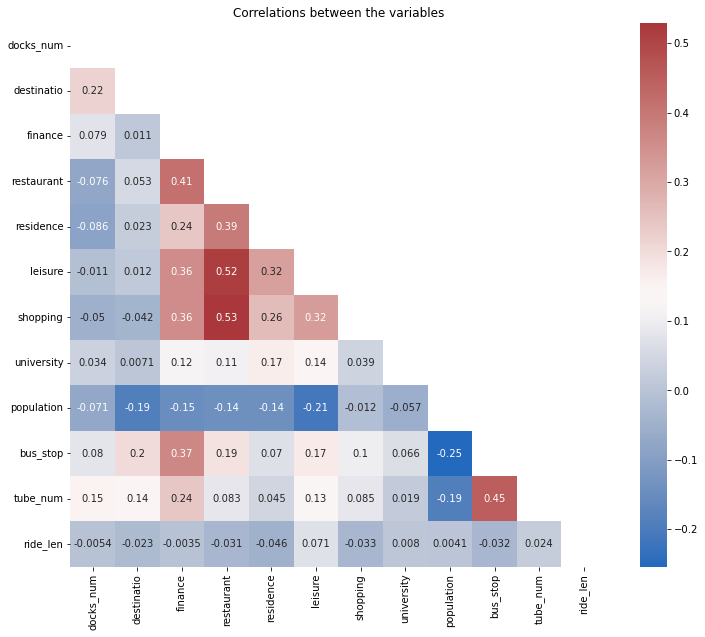

In [4]:
# matrix
feature = ['docks_num','destinatio','finance','restaurant','residence','leisure','shopping','university','population','bus_stop','tube_num','ride_len']

corr = results[feature].corr()


#
mask = np.triu(np.ones_like(corr, dtype=bool))


fig = plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="vlag", annot=True, mask=mask)
plt.title("Correlations between the variables")
fig.savefig('heatmap.png')



In [5]:
#vif test for cen_morning
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(cen_mopeak, thresh=5):
    while True:
        cen_mopeak_with_const = add_constant(cen_mopeak)
        vif_cen_mopeak = pd.Series(
            [
                variance_inflation_factor(cen_mopeak_with_const.values, i)
                for i in range(cen_mopeak_with_const.shape[1])
            ],
            name="VIF",
            index=cen_mopeak_with_const.columns,
        ).to_frame()
        vif_cen_mopeak = vif_cen_mopeak.drop("const")
        if vif_cen_mopeak.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_cen_mopeak.index[vif_cen_mopeak.VIF == vif_cen_mopeak.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            cen_mopeak = cen_mopeak.drop(columns=index_to_drop)
        else:
            break
    return cen_mopeak

In [6]:
#vif test for deg_night
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(cen_nipeak, thresh=5):
    while True:
        cen_nipeak_with_const = add_constant(cen_nipeak)
        vif_cen_nipeak = pd.Series(
            [
                variance_inflation_factor(cen_nipeak_with_const.values, i)
                for i in range(cen_nipeak_with_const.shape[1])
            ],
            name="VIF",
            index=cen_nipeak_with_const.columns,
        ).to_frame()
        vif_cen_nipeak = vif_cen_nipeak.drop("const")
        if vif_cen_nipeak.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_cen_nipeak.index[vif_cen_nipeak.VIF == vif_cen_nipeak.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            cen_nipeak = cen_nipeak.drop(columns=index_to_drop)
        else:
            break
    return cen_nipeak

In [7]:
#vif test for egi_night
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(egi_nipeak, thresh=5):
    while True:
        egi_nipeak_with_const = add_constant(egi_nipeak)
        vif_egi_nipeak = pd.Series(
            [
                variance_inflation_factor(egi_nipeak_with_const.values, i)
                for i in range(egi_nipeak_with_const.shape[1])
            ],
            name="VIF",
            index=egi_nipeak_with_const.columns,
        ).to_frame()
        vif_egi_nipeak = vif_egi_nipeak.drop("const")
        if vif_egi_nipeak.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_egi_nipeak.index[vif_egi_nipeak.VIF == vif_egi_nipeak.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            egi_nipeak = egi_nipeak.drop(columns=index_to_drop)
        else:
            break
    return egi_nipeak

In [8]:
#vif test for egi_morning
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(egi_mopeak, thresh=5):
    while True:
        egi_mopeak_with_const = add_constant(egi_mopeak)
        vif_egi_mopeak = pd.Series(
            [
                variance_inflation_factor(egi_mopeak_with_const.values, i)
                for i in range(egi_mopeak_with_const.shape[1])
            ],
            name="VIF",
            index=egi_mopeak_with_const.columns,
        ).to_frame()
        vif_egi_mopeak = vif_egi_mopeak.drop("const")
        if vif_egi_mopeak.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_egi_mopeak.index[vif_egi_mopeak.VIF == vif_egi_mopeak.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            egi_mopeak = egi_mopeak.drop(columns=index_to_drop)
        else:
            break
    return egi_mopeak

In [9]:
cen_mopeak_new = drop_column_using_vif_(cen_mopeak.drop('deg_mopeak', axis=1))

In [10]:
cen_nipeak_new = drop_column_using_vif_(cen_nipeak.drop('deg_nipeak', axis=1))

In [11]:
egi_nipeak_new = drop_column_using_vif_(egi_nipeak.drop('egi_nipeak', axis=1))

In [12]:
egi_mopeak_new = drop_column_using_vif_(egi_mopeak.drop('egi_mopeak', axis=1))

In [13]:
cen_mopeak_new.columns

Index(['docks_num', 'destinatio', 'finance', 'restaurant', 'residence',
       'leisure', 'shopping', 'university', 'population', 'bus_stop',
       'tube_num', 'ride_len'],
      dtype='object')

In [14]:
cen_nipeak_new.columns

Index(['docks_num', 'destinatio', 'finance', 'restaurant', 'residence',
       'leisure', 'shopping', 'university', 'population', 'bus_stop',
       'tube_num', 'ride_len'],
      dtype='object')

In [15]:
columns4 = ['docks_num', 'destinatio', 'finance',  'residence',
       'leisure', 'shopping', 'university', 'bus_stop','tube_num','deg_mopeak','population','restaurant','ride_len']

columns5 = ['docks_num', 'destinatio', 'finance',  'residence',
       'leisure', 'shopping', 'university', 'bus_stop','tube_num','deg_nipeak','population','restaurant','ride_len']
cen_mopeak_new_new1 = cen_mopeak[columns4]
cen_nipeak_new_new1 = cen_nipeak[columns5]

In [16]:
#deg_mopeak
ols_morning = sm.formula.ols('deg_mopeak ~ docks_num+destinatio+finance+residence+leisure+university+shopping+bus_stop+tube_num+population+restaurant+ride_len',data = cen_mopeak_new_new1).fit()
print(ols_morning.summary())

                            OLS Regression Results                            
Dep. Variable:             deg_mopeak   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     26.55
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.67e-50
Time:                        01:42:52   Log-Likelihood:                 1266.0
No. Observations:                 792   AIC:                            -2506.
Df Residuals:                     779   BIC:                            -2445.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0614      0.008      8.086      0.0

In [17]:
# deg_nipeak
ols_night = sm.formula.ols('deg_nipeak ~ docks_num+destinatio+finance+residence+leisure+university+shopping+bus_stop+tube_num+population+restaurant+ride_len',data = cen_nipeak_new_new1).fit()
print(ols_night.summary())

                            OLS Regression Results                            
Dep. Variable:             deg_nipeak   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     28.65
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.15e-54
Time:                        01:42:52   Log-Likelihood:                 847.81
No. Observations:                 792   AIC:                            -1670.
Df Residuals:                     779   BIC:                            -1609.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1406      0.013     10.919      0.0

In [18]:
#egi

columns6 = ['docks_num', 'destinatio', 'finance',  'residence',
       'leisure', 'shopping', 'university', 'bus_stop','tube_num','egi_mopeak','population','restaurant','ride_len']

columns7 = ['docks_num', 'destinatio', 'finance',  'residence',
       'leisure', 'shopping', 'university', 'bus_stop','tube_num','egi_nipeak','population','restaurant','ride_len']

In [19]:
egi_mopeak_new_new1 = egi_mopeak[columns6]
egi_nipeak_new_new1 = egi_nipeak[columns7]

In [20]:
#egi_mopeak
ols_morning_egi = sm.formula.ols('egi_mopeak ~ docks_num+destinatio+finance+residence+leisure+university+shopping+bus_stop+tube_num+population+restaurant+ride_len',data = egi_mopeak_new_new1).fit()
print(ols_morning_egi.summary())

                            OLS Regression Results                            
Dep. Variable:             egi_mopeak   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     31.95
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           6.15e-60
Time:                        01:42:52   Log-Likelihood:                 1944.3
No. Observations:                 792   AIC:                            -3863.
Df Residuals:                     779   BIC:                            -3802.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0267      0.003      8.268      0.0

In [21]:
#egi_nipeak
ols_night_egi = sm.formula.ols('egi_nipeak ~ docks_num+destinatio+finance+residence+leisure+university+shopping+bus_stop+tube_num+population+restaurant+ride_len',data = egi_nipeak_new_new1).fit()
print(ols_night_egi.summary())

                            OLS Regression Results                            
Dep. Variable:             egi_nipeak   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     23.65
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.08e-45
Time:                        01:42:52   Log-Likelihood:                 2232.6
No. Observations:                 792   AIC:                            -4439.
Df Residuals:                     779   BIC:                            -4378.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0136      0.002      6.088      0.0

In [22]:
##residual
columns = ['index','x','y','station_id']
df_residual = results[columns]


# egi_night
residuals4 = ols_night_egi.resid

df_residual['residuals4'] = residuals4

#eig_morning
residuals3 = ols_morning_egi.resid

df_residual['residuals3'] = residuals3

#deg_night
residuals2 = ols_night.resid

df_residual['residuals2'] = residuals2

#deg_morning
residuals1 = ols_morning.resid

df_residual['residuals1'] = residuals1

/tmp/ipykernel_113/3679345435.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residual['residuals4'] = residuals4
/tmp/ipykernel_113/3679345435.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residual['residuals3'] = residuals3
/tmp/ipykernel_113/3679345435.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [23]:
df_residual

,index,x,y,station_id,residuals4,residuals3,residuals2,residuals1
0,"River Street , Clerkenwell",531204.957572,182826.874389,1.0,-0.004931,-0.004047,-0.030986,-0.017397
1,"Phillimore Gardens, Kensington",525203.530183,179389.872735,2.0,0.008337,0.001771,0.091143,0.012826
2,"Christopher Street, Liverpool Street",532984.115424,182001.761003,3.0,-0.015229,0.021049,-0.056794,0.003744
3,"St. Chad's Street, King's Cross",530435.413114,182912.683769,4.0,0.002423,-0.004833,-0.028085,-0.043144
4,"Sedding Street, Sloane Square",528051.439096,178742.194456,5.0,0.011499,0.018398,0.131191,0.053106
...,...,...,...,...,...,...,...,...
787,"South Bermondsey Station, Bermondsey",534950.877189,178362.716371,788.0,-0.007743,-0.012669,-0.085705,-0.038179
788,"Crimscott Street, Bermondsey",533454.753045,179155.642693,789.0,0.001484,-0.004876,-0.028578,0.015501
789,"Brandon Street, Walworth",532599.977561,178412.274200,790.0,0.008076,-0.000786,0.003996,-0.013910
790,"The Blue, Bermondsey",534602.313462,178815.433593,791.0,-0.010176,-0.017070,-0.124865,-0.062097


In [24]:
df_residual.to_csv('residual.csv',index=False)